In [1]:
from ModelHandler import *


model_config = 'baseline_ResNet_LSTM-pretrain_embed2'
handle = ModelHandler(model_config)

Using the saved vocab.
Using the saved ingredient vocab.
orient no teacher
initialize embed using GloVe pretrained vectors
found 3196 words


In [2]:
df = handle.return_example()

=== Using best model from early stop ===


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [3]:
df

,title,instructions,ingredients,img_paths,predicted_ingredients,predicted_ingredients_unique,ing_sentence,pred_ing_sentence,bleu1,bleu4,jaccard
0,simple apple cake,pre heat the oven to 400f degrees. mix the egg...,"[apples, eggs, flour, sugar]",[/home/hsher/DeepRecipe/data/images/3/5/5/7/35...,"[salt, water, sugar, eggs, <unk>, potatoes, bu...","[<unk>, butter, cream - style corn, eggs, onio...",apples eggs flour sugar,<unk> butter cream - style corn eggs onion pot...,12.195122,0.126582,0.166667
1,turkey and farro stuffed peppers,"preheat oven to 350 f. using a small pot, brin...","[bell peppers, black beans, canned diced green...",[/home/hsher/DeepRecipe/data/images/1/9/7/f/19...,"[salt, olive oil, <unk>, salt and pepper, <unk...","[<unk>, butter, celery, garlic cloves, mozzare...",bell peppers black beans canned diced green ch...,<unk> butter celery garlic cloves mozzarella c...,18.518519,0.095238,0.080000
2,skirt steak with moroccan spice rub and yogurt...,light a grill. rub the steaks all over with 3 ...,"[dry rub seasonings, garlic clove, olive oil, ...",[/home/hsher/DeepRecipe/data/images/7/3/f/3/73...,"[salt, olive oil, unsalted butter, fresh lemon...","[<unk>, fresh lemon juice, fresh lime juice, h...",dry rub seasonings garlic clove olive oil pick...,<unk> fresh lemon juice fresh lime juice honey...,18.045113,0.076923,0.111111
3,chocolate peanut butter poke cake,prepare cake mix according to package directio...,"[Cool Whip, chocolate frosting, chocolate syru...",[/home/hsher/DeepRecipe/data/images/b/9/a/9/b9...,"[salt, vanilla extract, sugar, eggs, flour, bu...","[<unk>, baking soda, butter, chocolate chips, ...",cool whip chocolate frosting chocolate syrup p...,<unk> baking soda butter chocolate chips cinna...,10.169492,0.057471,0.050000
4,lemon butter stir-fry with chicken breast and ...,cut chicken breast thinly into bite size piece...,"[butter, cabbage, chicken breasts, katakuriko,...",[/home/hsher/DeepRecipe/data/images/5/f/2/6/5f...,"[salt, olive oil, <unk>, salt and pepper, <unk...","[<unk>, butter, fettuccine, garlic cloves, lem...",butter cabbage chicken breasts katakuriko lemo...,<unk> butter fettuccine garlic cloves lemon ju...,17.592593,0.095238,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
59,mexican spaghetti,saute crushed garlic cloves in olive oil. add ...,"[corn, fresh cilantro, garlic cloves, green pe...",[/home/hsher/DeepRecipe/data/images/6/0/3/c/60...,"[salt, olive oil, <unk>, garlic cloves, butter...","[<unk>, angel hair pasta, butter, celery, chee...",corn fresh cilantro garlic cloves green pepper...,<unk> angel hair pasta butter celery cheese ga...,18.947368,0.108696,0.250000
60,strawberry & plum crumble,1. preheat oven to 375 degrees f and place rac...,"[baking powder, butter, cinnamon, egg, flour, ...",[/home/hsher/DeepRecipe/data/images/1/4/0/1/14...,"[salt, water, sugar, eggs, <unk>, garlic clove...","[<unk>, butter, eggs, garlic cloves, ground ci...",baking powder butter cinnamon egg flour flour ...,<unk> butter eggs garlic cloves ground cinnamo...,23.684211,0.136986,0.105263
61,courting cake,pre-heat oven to 190c/375f. grease and line th...,"[butter, caster sugar, confectioners' sugar, e...",[/home/hsher/DeepRecipe/data/images/4/8/3/b/48...,"[salt, all - purpose flour, sugar, eggs, <unk>...","[<unk>, all - purpose flour, baking soda, butt...",butter caster sugar confectioners' sugar eggs ...,<unk> all - purpose flour baking soda butter c...,19.230769,0.099010,0.187500
62,breakfast pizza,sprinkle the cheese over the pizza dough. top ...,"[butter, cheese, eggs, milk, mushrooms, onions...",[/home/hsher/DeepRecipe/data/images/d/d/7/1/dd...,"[salt, cheddar cheese, eggs, <unk>, garlic clo...","[<unk>, butter, cheddar cheese, diced tomatoes...",butter cheese eggs milk mushrooms onions peppe...,<unk> butter cheddar cheese diced tomatoes egg...,16.071429,0.091743,0.117647


In [4]:
def jaccard_index(df):
    for index, row in df.iterrows():
        in_ = set(row['ingredients']).intersection(row['predicted_ingredients'])
        all_ = set(row['ingredients']).union(row['predicted_ingredients'])
        df.loc[index, 'jaccard'] = len(in_)/len(all_)

In [5]:
jaccard_index(df)

In [13]:
df.sort_values(by = 'jaccard').iloc[:20]

,title,instructions,ingredients,img_paths,predicted_ingredients,predicted_ingredients_unique,ing_sentence,pred_ing_sentence,bleu1,bleu4,jaccard
31,maple dijon glazed ham steaks,place ham steaks in a large nonstick pan. (do ...,"[, Dijon mustard, apple cider vinegar, pure ma...",[/home/hsher/DeepRecipe/data/images/2/5/4/2/25...,"[salt, olive oil, <unk>, garlic cloves, butter...","[<unk>, butter, garlic cloves, olive oil, onio...",dijon mustard apple cider vinegar pure maple ...,<unk> butter garlic cloves olive oil onion sal...,15.454545,0.093458,0.000000
51,rainbow fruit delight,coat 9x5-inch loaf pan with non-stick cooking ...,"[boiling water, crushed pineapple, evaporated ...",[/home/hsher/DeepRecipe/data/images/1/c/3/2/1c...,"[salt, water, sugar, eggs, <unk>, cinnamon, mi...","[<unk>, cake flour, cinnamon, cocoa powder, co...",boiling water crushed pineapple evaporated mil...,<unk> cake flour cinnamon cocoa powder confect...,17.968750,0.080000,0.000000
43,pokemon pikachu charaben,mix the decofuri rice seasoning with rice. wra...,"[cheese, cooked rice, nori, sausage, seasoning]",[/home/hsher/DeepRecipe/data/images/4/b/6/e/4b...,"[salt, olive oil, sugar, red pepper flakes, sa...","[<unk>, carrots, flat leaf parsley, garlic clo...",cheese cooked rice nori sausage seasoning,<unk> carrots flat leaf parsley garlic cloves ...,8.333333,0.060606,0.000000
40,spicy-sweet tangerine shrimp with baby bok choy,cover bottom of large skillet with 1/2 inch wa...,"[baby bok choy, distilled white vinegar, fresh...",[/home/hsher/DeepRecipe/data/images/e/9/0/c/e9...,"[salt, olive oil, pepper, butter, vegetable oi...","[<unk>, butter, garlic cloves, linguine, olive...",baby bok choy distilled white vinegar fresh gi...,<unk> butter garlic cloves linguine olive oil ...,14.634146,0.083333,0.000000
34,fancy ants on a log,optional step: soak raisins in just enough rum...,"[celery, cream cheese, honey, raisins, rum, un...",[/home/hsher/DeepRecipe/data/images/9/b/7/e/9b...,"[salt, water, sugar, eggs, <unk>, cinnamon, bu...","[<unk>, baking soda, butter, chocolate chips, ...",celery cream cheese honey raisins rum unsalted...,<unk> baking soda butter chocolate chips cinna...,13.076923,0.078740,0.000000
32,easy chicken enchiladas,"preheat oven to 325f. in a large mixing bowl, ...","[Mexican blend cheese, cream cheese, salsa, sa...",[/home/hsher/DeepRecipe/data/images/3/4/1/a/34...,"[salt, water, sugar, eggs, <unk>, garlic clove...","[<unk>, butter, eggs, garlic cloves, mozzarell...",mexican blend cheese cream cheese salsa salsa ...,<unk> butter eggs garlic cloves mozzarella che...,22.093023,0.120482,0.000000
24,sauteed shio-koji marinated chicken breast wit...,slice the chicken into about 1.5cm-thick diago...,"[chicken breast, honey, katakuriko, mayonnaise...",[/home/hsher/DeepRecipe/data/images/5/a/3/6/5a...,"[salt, water, <unk>, eggs, <unk>, garlic clove...","[<unk>, butter, cream of chicken soup, eggs, g...",chicken breast honey katakuriko mayonnaise ses...,<unk> butter cream of chicken soup eggs garlic...,16.504854,0.100000,0.000000
21,joy's amazing spinach - artichoke dip,heat oven to 400f squeeze the thawed spinach b...,"[artichoke hearts, black pepper, cheddar chees...",[/home/hsher/DeepRecipe/data/images/b/4/a/9/b4...,"[salt, all - purpose flour, sugar, eggs, <unk>...","[<unk>, all - purpose flour, butter, eggs, ext...",artichoke hearts black pepper cheddar cheese f...,<unk> all - purpose flour butter eggs extra - ...,13.571429,0.072993,0.000000
18,pear and vanilla yogurt parfaits,"combine cereal, cranberries and almonds. layer...","[all - bran cereal, almonds, dried cranberries...",[/home/hsher/DeepRecipe/data/images/c/0/b/e/c0...,"[salt, water, sugar, eggs, <unk>, whipping cre...","[<unk>, angel flake coconut, eggs, ground cinn...",all - bran cereal almonds dried cranberries no...,<unk> angel flake coconut eggs ground cinnamon...,15.596330,0.094340,0.000000
15,turkey empanadas grande,"in a large skillet over medium-high heat, saut...","[dried cila

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
def show_n_imgs(img_paths, title):
    
    if len(img_paths)==1:
        f, axes = plt.subplots()
        axes = [axes]
    else:

        f, axes = plt.subplots(2, math.ceil(len(img_paths)/2))
    try:
        axes = axes.flatten()
    except:
        pass
    for i, ax in zip(img_paths, axes):
        img = mpimg.imread(i)
        ax.imshow(img)

    _=[ax.axis('off') for ax in axes]
    plt.suptitle(title)
    plt.tight_layout()

ACTUAL INGREDIENTS: boiling water,crushed pineapple,evaporated milk,frozen strawberries,lemon gelatin,mandarin oranges,orange gelatin,strawberry gelatin
PRED INGREDIENTS: salt,water,sugar,eggs,<unk>,cinnamon,milk,lemon juice,sugar,confectioners' sugar,sugar,confectioners' sugar,cocoa powder,milk,heavy cream,cake flour,fresh raspberries,milk,heavy cream,confectioners' sugar


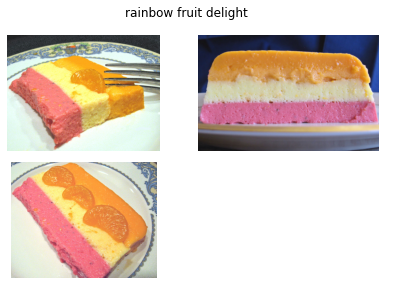

In [11]:

row = df.iloc[51]
show_n_imgs(row['img_paths'], row['title'])

print('ACTUAL INGREDIENTS:', ','.join(row['ingredients']))
print('PRED INGREDIENTS:', ','.join(row['predicted_ingredients']))

ACTUAL INGREDIENTS: cheese,cooked rice,nori,sausage,seasoning
PRED INGREDIENTS: salt,olive oil,sugar,red pepper flakes,salt & freshly ground black pepper,vegetable oil,red pepper flakes,<unk>,garlic cloves,shallots,flat leaf parsley,onion,sherry wine vinegar,carrots,sherry wine vinegar,carrots,sherry wine vinegar,carrots,sherry wine vinegar,carrots


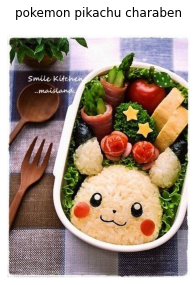

In [9]:
row = df.iloc[43]
show_n_imgs(row['img_paths'], row['title'])

print('ACTUAL INGREDIENTS:', ','.join(row['ingredients']))
print('PRED INGREDIENTS:', ','.join(row['predicted_ingredients']))

ACTUAL INGREDIENTS: baguette,boneless skinless chicken breasts,carrots,five - spice powder,fresh cilantro,fresh lime juice,garlic clove,jalapeno chile,low - fat mayonnaise,rice wine vinegar,salt,sugar,white onions
PRED INGREDIENTS: salt,olive oil,onion,tomatoes,vegetable oil,salt and pepper,<unk>,garlic cloves,pepper,pizza sauce,onion,hamburger buns,pepper,hamburger buns,pepper,hamburger buns,pepper,hamburger buns,flour tortillas,<unk>


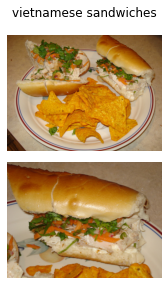

In [14]:
row = df.loc[35]
show_n_imgs(row['img_paths'], row['title'])

print('ACTUAL INGREDIENTS:', ','.join(row['ingredients']))
print('PRED INGREDIENTS:', ','.join(row['predicted_ingredients']))